# Introduction

It is important for every organisation to know its customers. By knowing them, they can effectively take measures if they are divided into smaller groups, which is termed customer segmentation. 

This is possible with the help of the K-means clustering algorithm. This algorithm is used to divide the customer features into groups of K-clusters, which can then be visualised and understood to achieve a certain goal.

# Customer Segmentation 

Customer segmentation is the process of categorising consumers based on segmentation parameters such as demographic, geographic, or behavioural factors. To better understand the consumer, we may analyse the given data and use its features to better understand them.

Customer segmentation may help with customer happiness, retention rates, and even price optimisation. Its primary purpose is to identify and prioritise the best among a group of consumers and take the appropriate actions

# Importing libraries


In [82]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sea

In [83]:
df = pa.read_csv('C:/Users/varshithbr/Desktop/python projects/Customer Segmentation task 1/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
df.rename(columns ={'Male':'Aan'},inplace=True)

In [85]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.rename(columns ={'Gender':'Sex'},inplace=True)

In [87]:
df.head()

,CustomerID,Sex,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df.rename(columns ={'Sex':'Gender'},inplace=True)

In [89]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [90]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
df.shape

(200, 5)

In [92]:
df.size

1000

In [93]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [95]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [96]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [97]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [98]:
dfc=df.copy()

In [99]:
dfc.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [100]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Distribution plot 

C:\Users\varshithbr\AppData\Local\Temp\ipykernel_5408\2246032849.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df[x] , bins = 20)
C:\Users\varshithbr\AppData\Local\Temp\ipykernel_5408\2246032849.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df[x] , bins = 20)
C:\Users\varshithbr\AppD

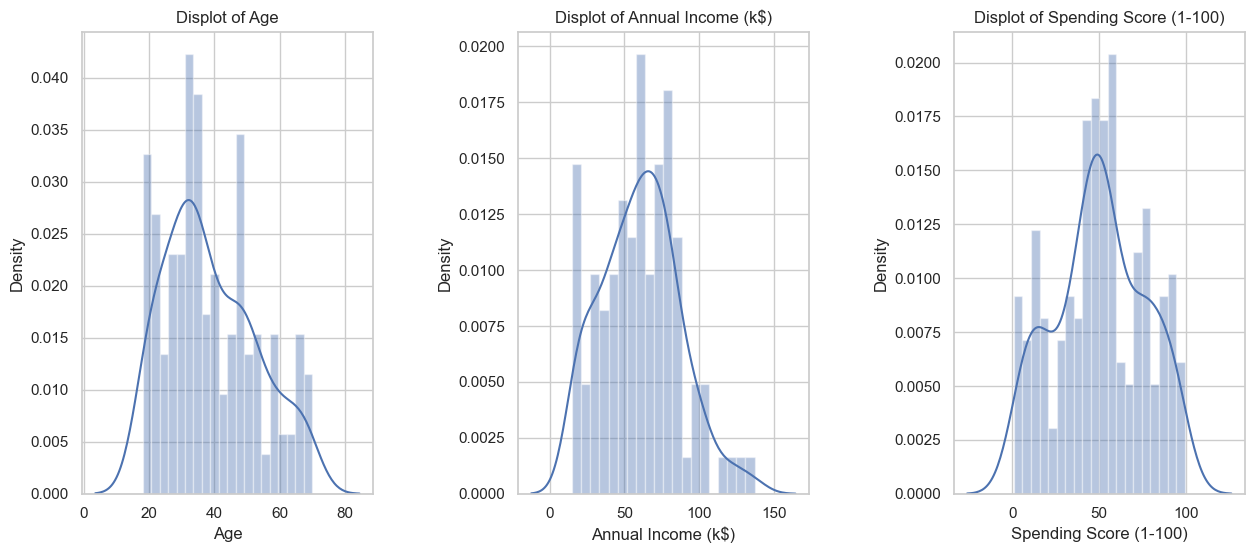

In [101]:
plt.figure(6, figsize=(15,6))
n=0
for x in ['Age',  'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5, wspace= 0.5)
    sea.distplot(df[x] , bins = 20)
    plt.title('Displot of {}'.format(x))
plt.show()

# Number of male vs female

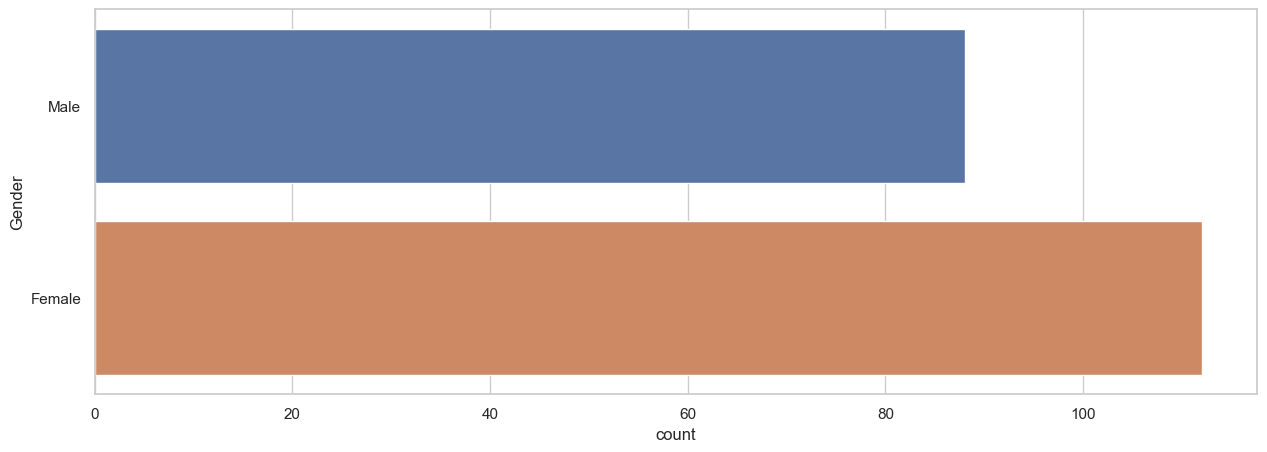

In [102]:
plt.figure(figsize=(15,5))
sea.countplot(y='Gender',data=df)
plt.show()

# Violin plot
Representing Age , Annual Income , Spending Score based on Gender

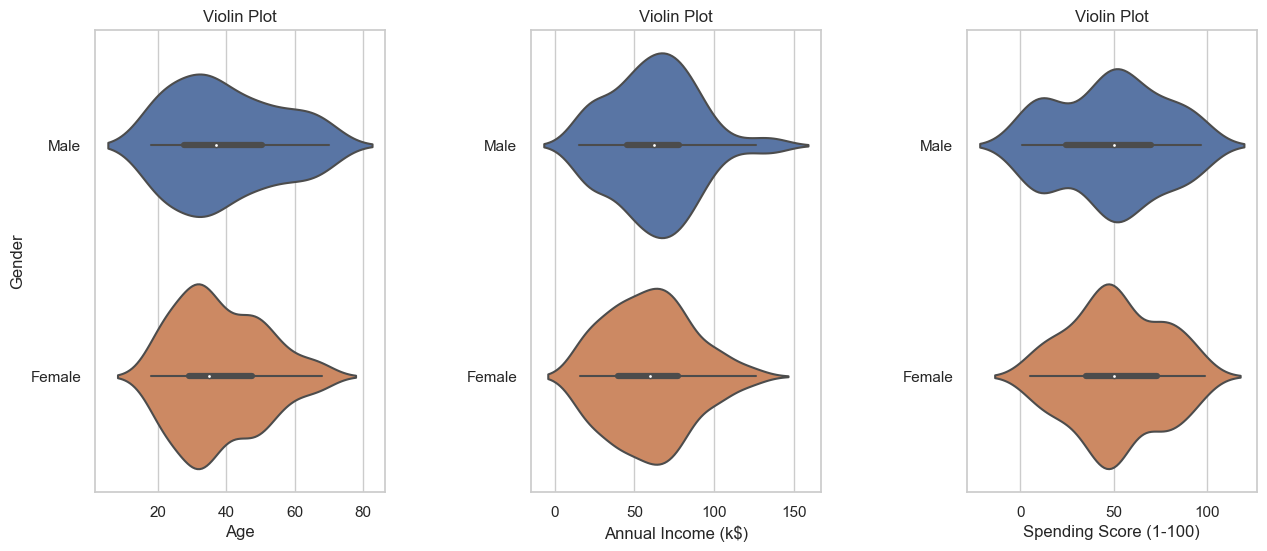

In [103]:
plt.figure(figsize=(15,6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1 ,3, n)
    plt.subplots_adjust(hspace = 0.5, wspace= 0.5)
    sea.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()
    


# Barplot

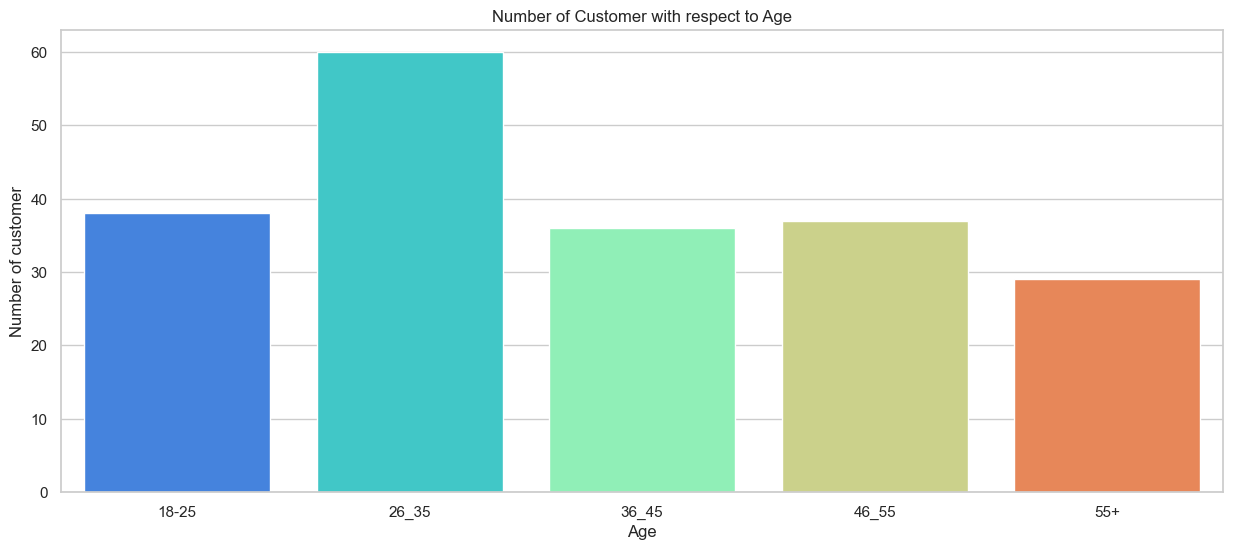

In [104]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above=df.Age[df.Age >=56]

agex = ["18-25" , "26_35" , "36_45" , "46_55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sea.barplot(x=agex, y=agey, palette="rainbow")
plt.title("Number of Customer with respect to Age")
plt.xlabel("Age")
plt.ylabel("Number of customer")
plt.show()

# Relationship plot

C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


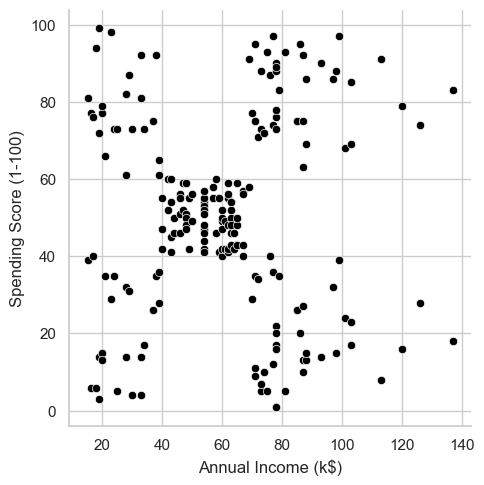

In [105]:
sea.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color="black")
plt.show()

# Barplot

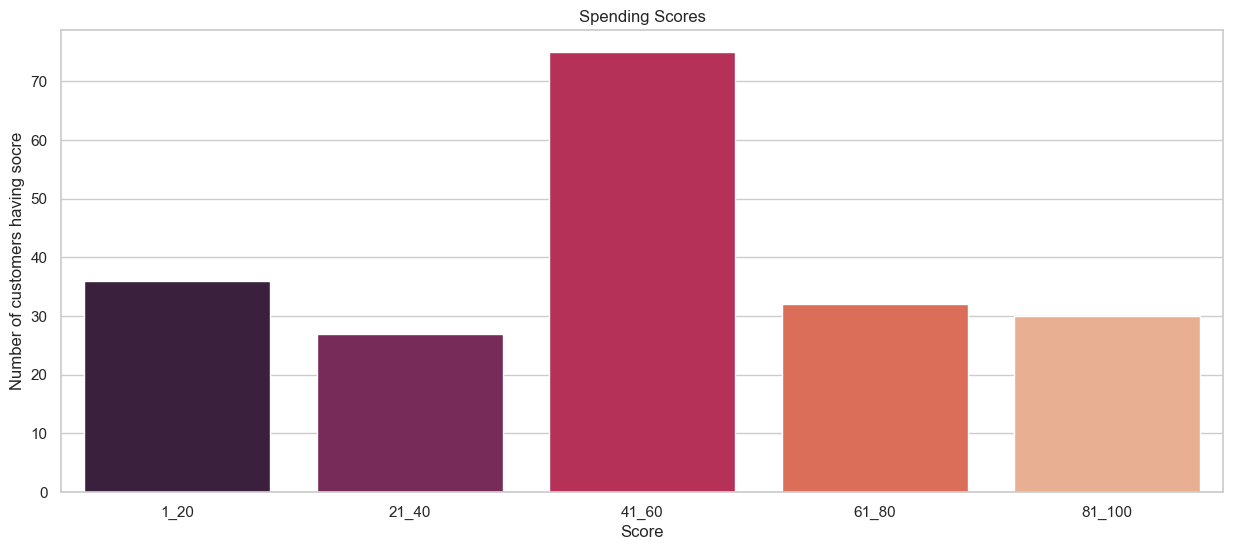

In [106]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1_20", "21_40", "41_60", "61_80", "81_100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)] 

plt.figure(figsize=(15,6))
sea.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of customers having socre")
plt.show()

In [107]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


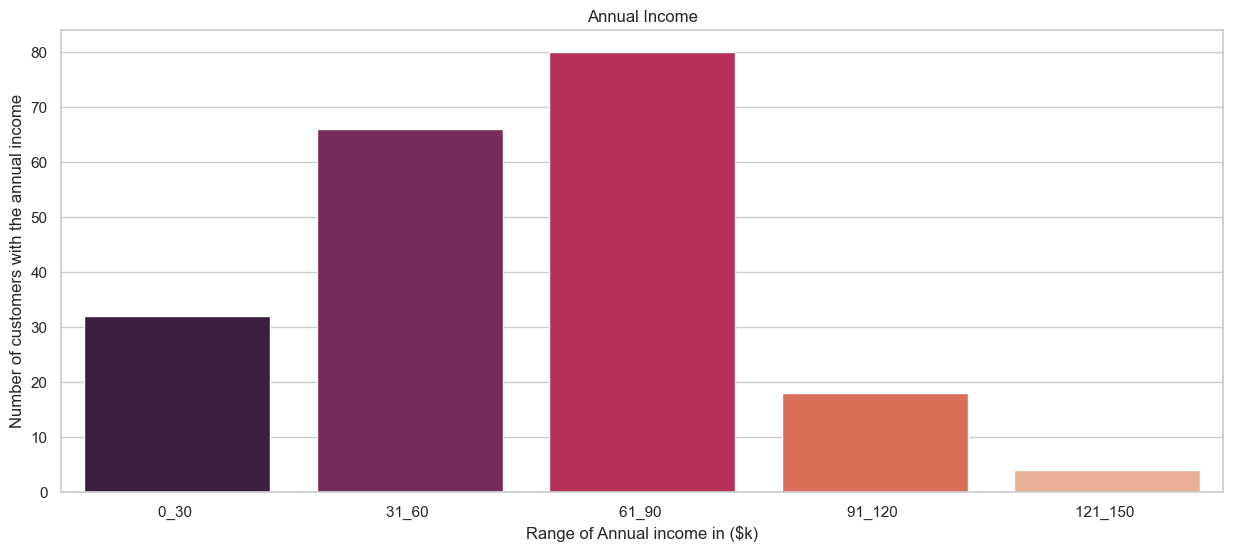

In [108]:
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=0) & (df['Annual Income (k$)'] <=30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=31) & (df['Annual Income (k$)'] <=60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=61) & (df['Annual Income (k$)'] <=90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=91) & (df['Annual Income (k$)'] <=120)]
a121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >=121) & (df['Annual Income (k$)'] <=150)]

aix = ["0_30 ", "31_60 ", "61_90 ", "91_120 ", "121_150 "]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(a121_150.values)]

plt.figure(figsize=(15,6))
sea.barplot(x=aix, y=aiy, palette="rocket")
plt.title("Annual Income")
plt.xlabel("Range of Annual income in ($k)")
plt.ylabel("Number of customers with the annual income")
plt.show()

# K means Clustering

In order to obtain clusters, we need to use the elbow method to determine the optimal number of clusters in k-means clustering along with WCSS.

C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-p

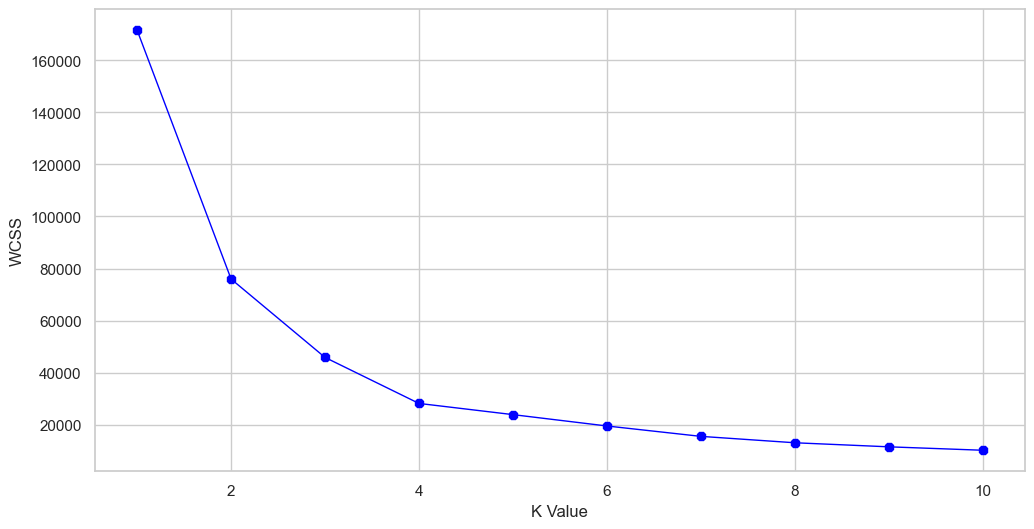

In [109]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

#plotting
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=1, color="blue", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [110]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


In [112]:
df['cluster'] = label
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,3


In [113]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51


# Scatter plot 1

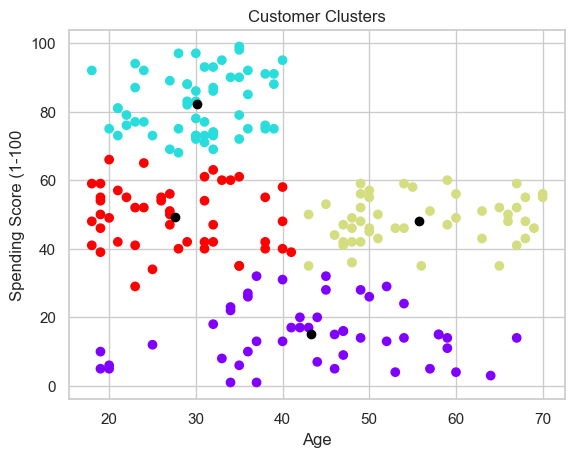

In [114]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100')
plt.show()

In the above plot, the number of optimal clusters taken was 4. It is being categorised with respect to the age of the customers.

We get a clear insight that the customers with the highest scores are aged 40 or below.

It was balanced overall, with people from age 20 to 70 having a score of almost 63 or below.

It is clear that people who spend a lot are aged 20 to 40.

In [115]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,3


Now its time to consider other features.

Here we are considering Annual Income and Spending Score

C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-p

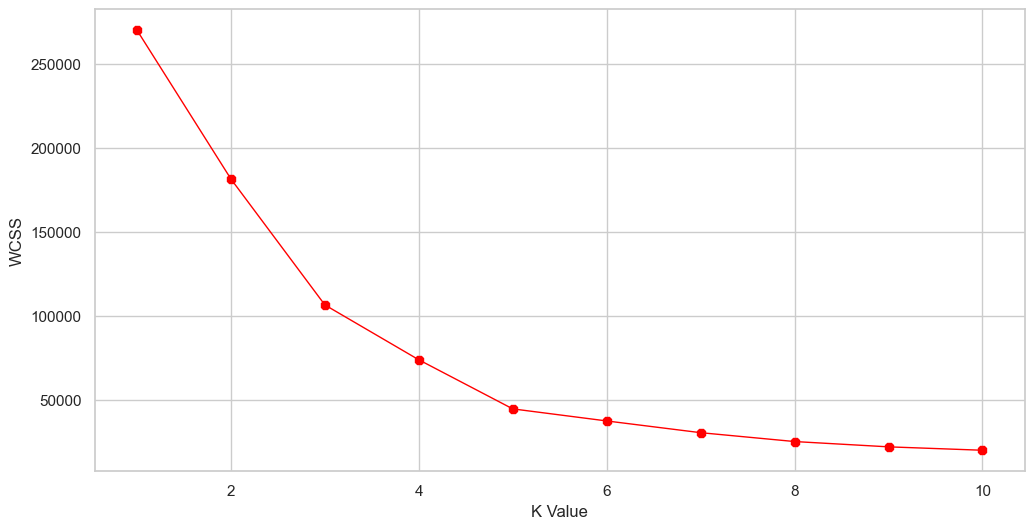

In [116]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss, linewidth=1, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [117]:
#within cluster sum of squares (wcss)

wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484346,
 30273.394312070042,
 24995.96978113596,
 21838.863692828912,
 19811.04328579222]

In [130]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 3 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [131]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


In [132]:
X2[label==0,1]

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

# Scatter plot 2

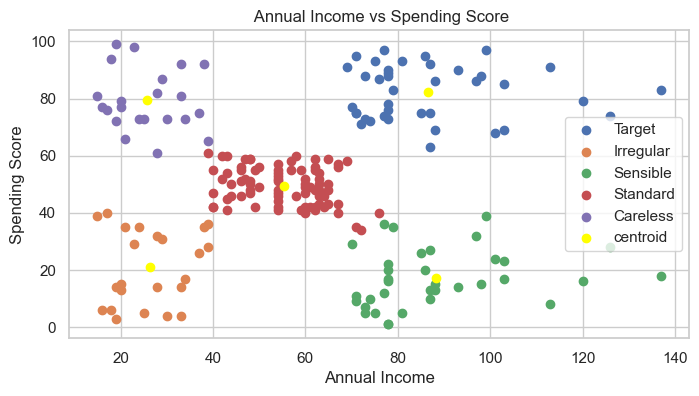

In [134]:
plt.figure(figsize=(8,4))
plt.scatter(X2[label==0,0],X2[label==0,1], label="Target")
plt.scatter(X2[label==1,0],X2[label==1,1], label="Irregular")
plt.scatter(X2[label==2,0],X2[label==2,1], label="Sensible")
plt.scatter(X2[label==3,0],X2[label==3,1], label="Standard")
plt.scatter(X2[label==4,0],X2[label==4,1], label="Careless")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="yellow", label="centroid")
plt.legend()

plt.title(' Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In the above plot, it is clearly segmented with the respective features.
Here, we understand that:

They are people who spend more, but their annual income is less.

They are people who spend less, and their annual income is less.

They are people who spend less, and their annual income is higher.

They are people who spend on average, and their annual income is average.

They are people who spend more, and their annual income is higher.

Our Target Customers are the ones represented in green, along with the Standard customers. These must be given high priority compared to other groups to achieve the organisation's goal.i.e., increase overall sales,brand awareness, etc.

In [141]:
df['cluster']=label
df.drop(columns=['label','clusters'])


,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


In [140]:
#Target
X2[label==0,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

# 3d PLot 

C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-p

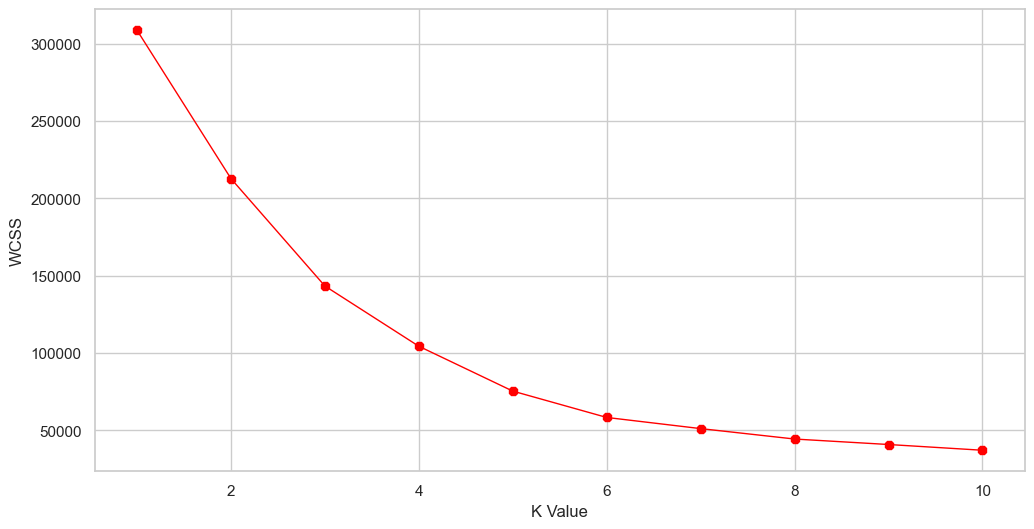

In [124]:
X3 = df.loc[:,["Age","Annual Income (k$)", "Spending Score (1-100)"]].values



wcss=[]
for k in range(1,11):
    
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss, linewidth=1, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [125]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [126]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


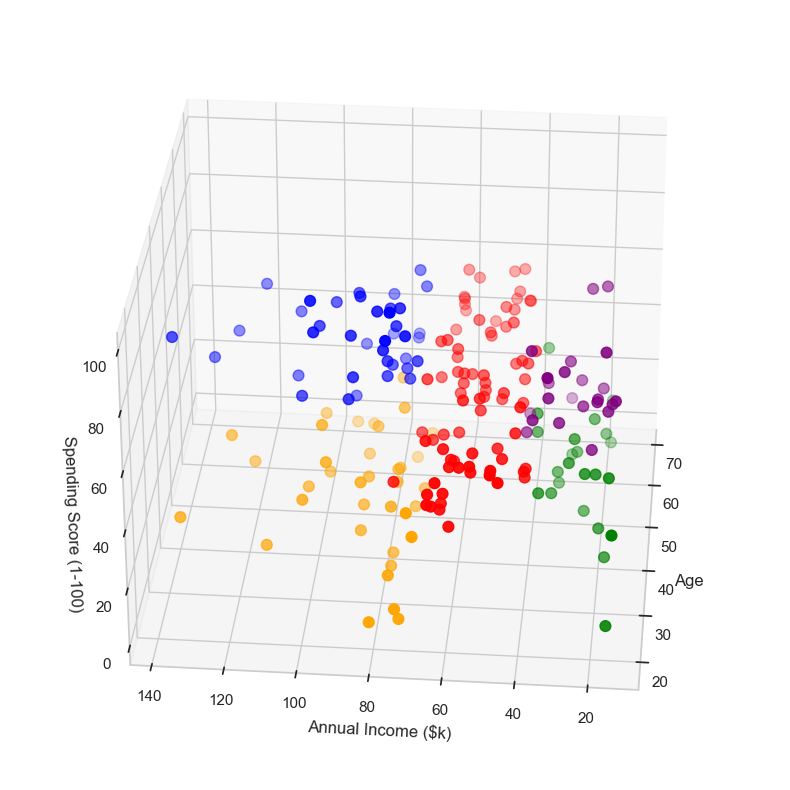

In [127]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label==0], df["Annual Income (k$)"][df.label==0], df["Spending Score (1-100)"][df.label==0],c='blue', s=60)
ax.scatter(df.Age[df.label==1], df["Annual Income (k$)"][df.label==1], df["Spending Score (1-100)"][df.label==1],c='red', s=60)
ax.scatter(df.Age[df.label==2], df["Annual Income (k$)"][df.label==2], df["Spending Score (1-100)"][df.label==2],c='green', s=60)
ax.scatter(df.Age[df.label==3], df["Annual Income (k$)"][df.label==3], df["Spending Score (1-100)"][df.label==3],c='orange', s=60)
ax.scatter(df.Age[df.label==4], df["Annual Income (k$)"][df.label==4], df["Spending Score (1-100)"][df.label==4],c='purple', s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income ($k)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

# Conclusion

As represented in Scatterplot 2, we get a clear set of segments according to the features, and we have obtained our target audience. This way, we can prioritise various customers in those categories by sending mail, notifying them about new products, providing offers, and many other approaches or strategies. It will be very helpful in raising brand awareness. This will also help increase overall revenue.